<a href="https://colab.research.google.com/github/rohandhiman5/IVDC-induction-Rohan/blob/main/Problem_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install opencv-python


In [ ]:
from google.colab.patches import cv2_imshow

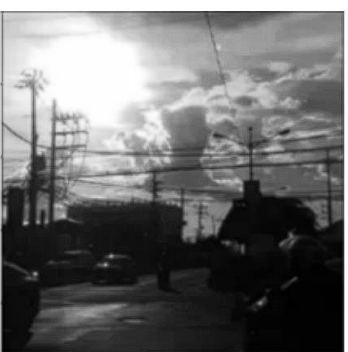

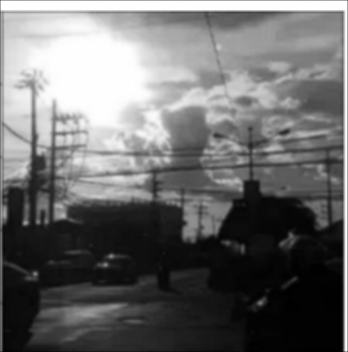

In [ ]:
import cv2
import numpy as np

def mean_filter(image, kernel_size):
    padded_image = cv2.copyMakeBorder(image,
                                      kernel_size//2,
                                      kernel_size//2,
                                      kernel_size//2,
                                      kernel_size//2,
                                      cv2.BORDER_CONSTANT)


    filtered_image = np.zeros_like(image)


    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            window = padded_image[y:y+kernel_size, x:x+kernel_size]
            mean_value = np.mean(window)
            filtered_image[y, x] = mean_value

    return filtered_image
image = cv2.imread('/content/Screenshot 2024-04-16 023355.png', cv2.IMREAD_GRAYSCALE)


kernel_size = 3
filtered_image = mean_filter(image, kernel_size)

cv2_imshow(image)
cv2_imshow(filtered_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

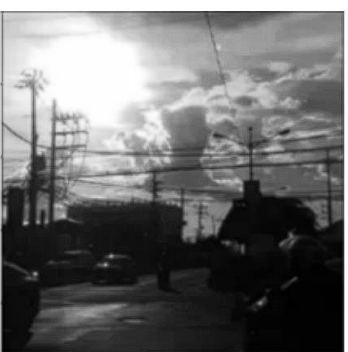

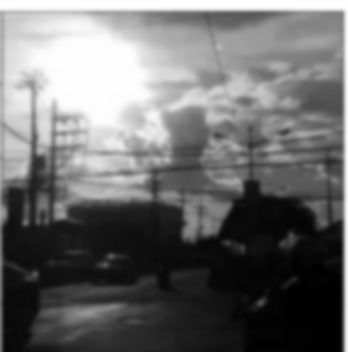

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import convolve

def gaussian_kernel(size, size_y=None):
   size = int(size)
   if not size_y:
       size_y = size
   else:
       size_y = int(size_y)
   x, y = np.mgrid[-size:size+1, -size_y:size_y+1]
   g = np.exp(-(x**2/float(size) + y**2/float(size_y)))
   return g / g.sum()
kernel_size = 7

gaussian_kernel_array = gaussian_kernel(kernel_size)

image = cv2.imread('/content/Screenshot 2024-04-16 023355.png', cv2.IMREAD_GRAYSCALE)


filtered_image = convolve(image, gaussian_kernel_array)

cv2_imshow( image)
cv2_imshow( filtered_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

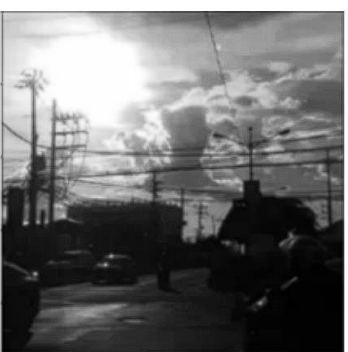

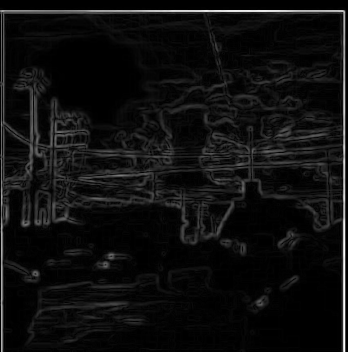

In [ ]:
import cv2
import numpy as np

def sobel_filter(image):
 sobel_x_kernel = np.array([[-1, 0, 1],
                             [-2, 0, 2],
                             [-1, 0, 1]])

 sobel_y_kernel = np.array([[-1, -2, -1],
                             [0, 0, 0],
                             [1, 2, 1]])

 sobel_x = cv2.filter2D(image, cv2.CV_64F, sobel_x_kernel)
 sobel_y = cv2.filter2D(image, cv2.CV_64F, sobel_y_kernel)

 gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
 normalized_gradient = cv2.normalize(gradient_magnitude, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

 return normalized_gradient
image_path = '/content/Screenshot 2024-04-16 023355.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

output_edge_image = sobel_filter(image)

cv2_imshow( image)
cv2_imshow( output_edge_image)
cv2.waitKey(0)
cv2.destroyAllWindows()